In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

## Analytic Solution of Burgers Equation

The solution to the viscous Burgers equation with initial condition $f(x)=u(x,0)$ can be written
$$ u(x, t)=-2 \nu \frac{\partial}{\partial x} \ln \left\{(4 \pi \nu t)^{-1 / 2} \int_{-\infty}^{\infty} \exp \left[-\frac{\left(x-x^{\prime}\right)^2}{4 \nu t}-\frac{1}{2 \nu} \int_0^{x^{\prime}} f\left(x^{\prime \prime}\right) d x^{\prime \prime}\right] d x^{\prime}\right\} $$

In [2]:
# this is specific to the initial condition f(x) = -sin(pi*x). You can change this to any function f whose antiderivative can be evaluated!
def init_integral(x_prime):
    return ( - 1/(2*nu) * (1/np.pi) * ( np.cos(np.pi*x_prime) - 1) )

def quadratic(x,t,x_prime):
    return ( - (x-x_prime)**2/(4*nu*t) )

def trapz(x,t,x_prime):
    trapz_pts = np.exp( quadratic(x,t,x_prime) + init_integral(x_prime))
    return ( np.trapz(y=trapz_pts,x=x_prime) )

def ln(x,t,x_prime):
    return np.log( trapz(x,t,x_prime)/np.sqrt( 4*np.pi*nu*t )  )

def centered_diff(x,t,x_prime,h):
    return ( ( ln(x + h,t,x_prime) - ln(x - h,t,x_prime) )/(2*h) )

def u(x,t,x_prime,h):
    return(-2*nu*centered_diff(x,t,x_prime,h))

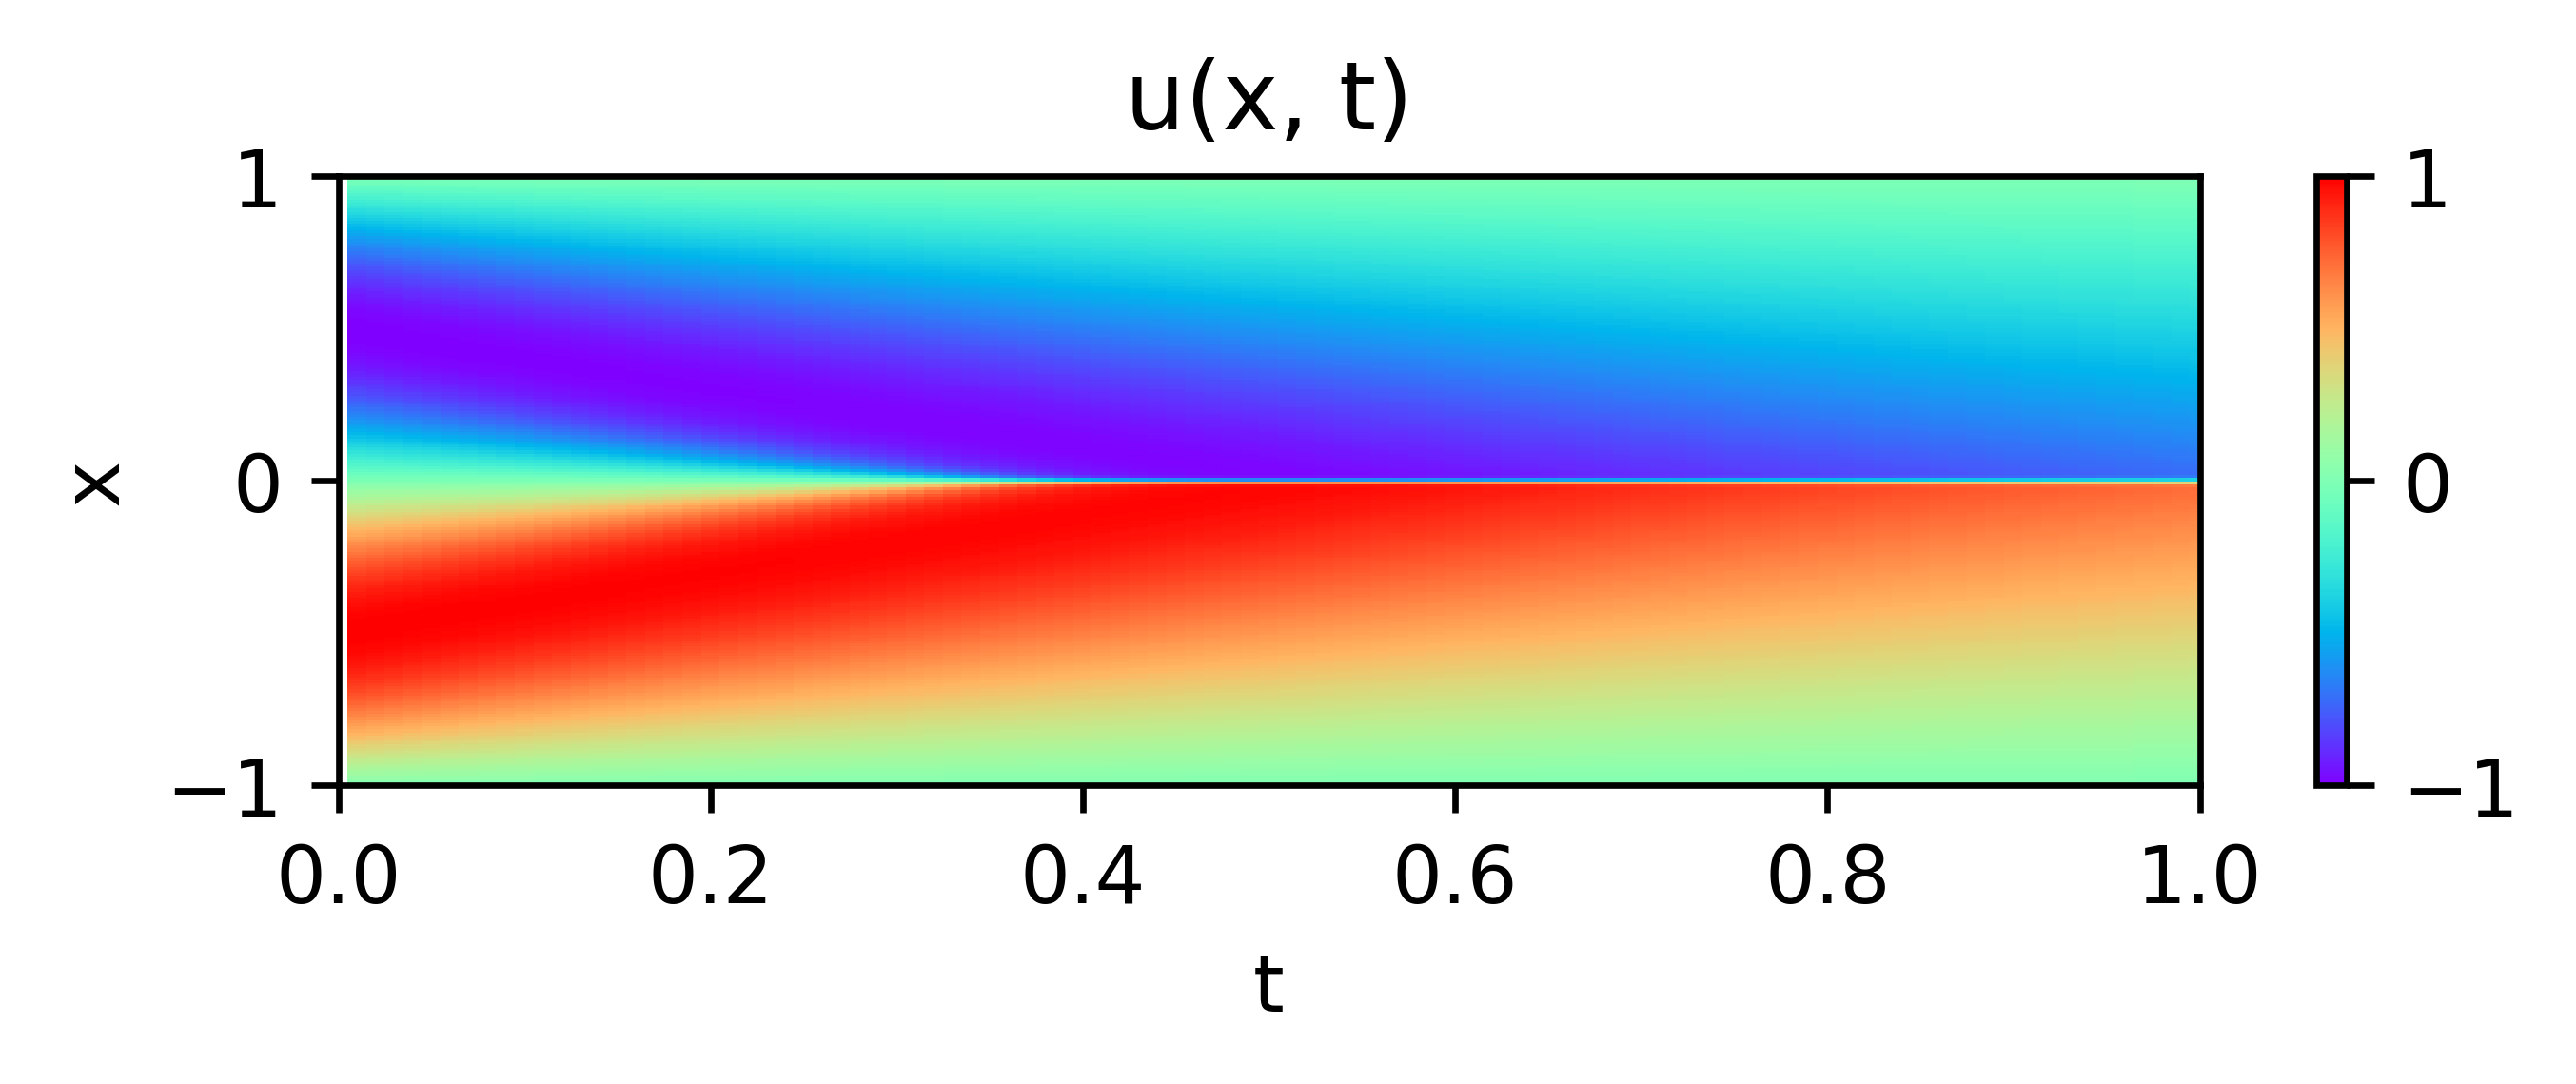

In [7]:
# given parameter
nu = 0.01/np.pi


# generate points to approximate the outer integral
x_bound = 10
num_pts = 10001
x_prime = np.linspace(-x_bound,x_bound,num_pts)

# step size to approximate the derivative in front of the natural log
h = 0.001

# generate grid of x, t, u(x,t) for plotting
x_len = 200
t_len = 100
x_array = np.linspace(-1,1,x_len)
t_array = np.linspace(0.01,1,t_len)
u_array = np.zeros( (x_len,t_len) )

for i in range(x_len):
    for j in range(t_len):
        u_array[i,j] = u(x_array[i],t_array[j],x_prime,h)

plt.figure(figsize=(5, 2), dpi=600)
plt.pcolor(t_array, x_array, u_array, cmap=cm.rainbow )
plt.colorbar()
plt.xlim(0., +1.)
plt.ylim(-1., +1.)
plt.clim(-1, +1)
plt.title("u(x, t)")
plt.ylabel("x")
plt.xlabel("t")
plt.tight_layout()
plt.savefig('burger_true_sol.png')
plt.show()


In [8]:
plt.savefig('burger_true_sol.png')

<Figure size 640x480 with 0 Axes>

Load from saved

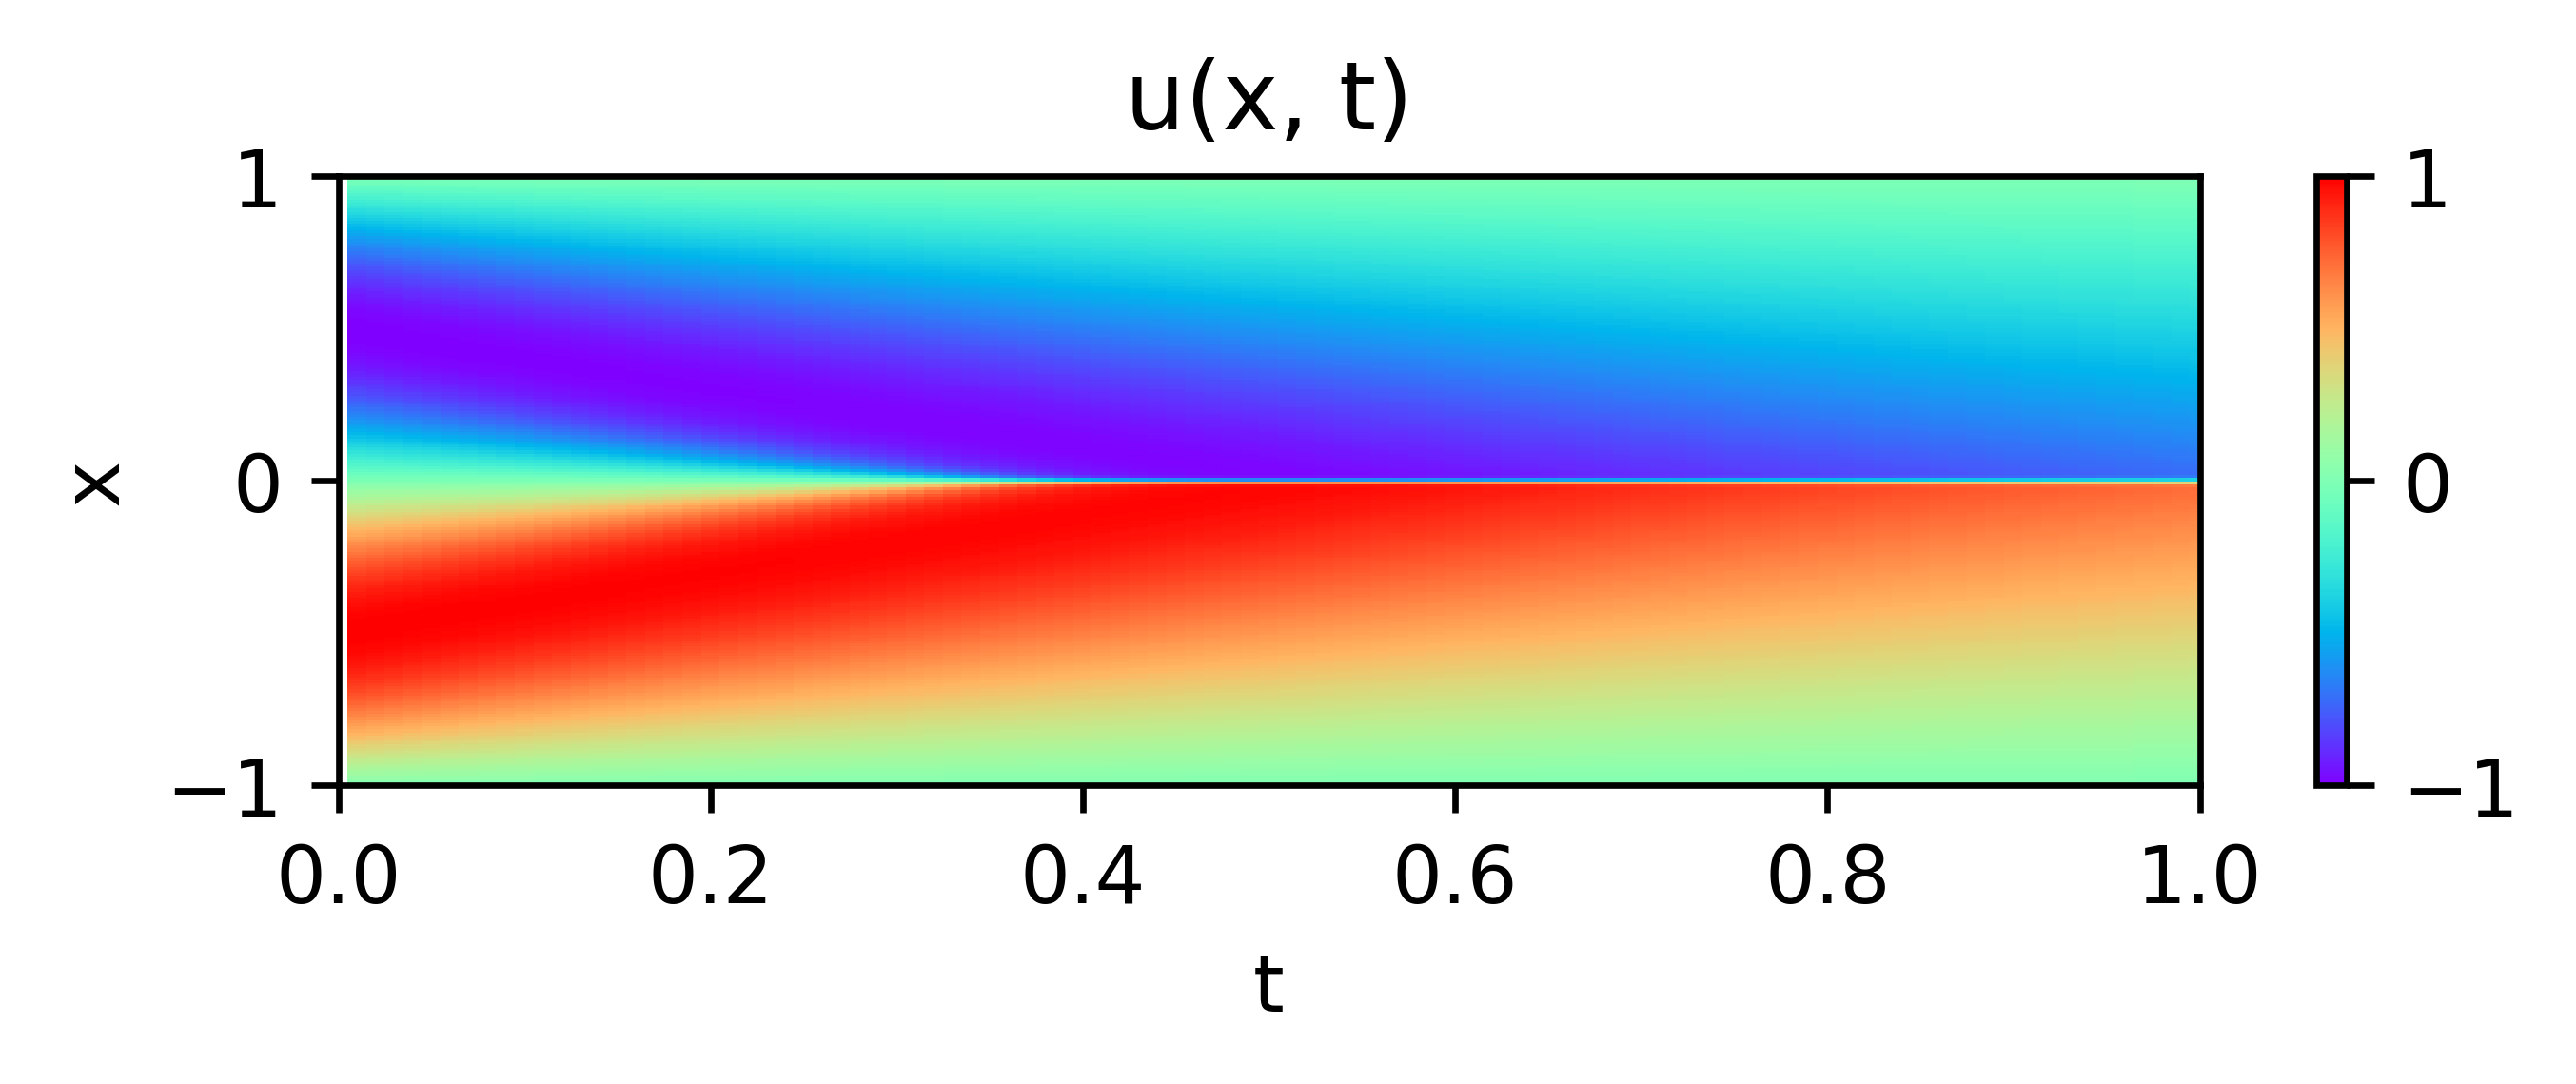

In [3]:
# given parameter
nu = 0.01/np.pi


# generate points to approximate the outer integral
x_bound = 10
num_pts = 10001
x_prime = np.linspace(-x_bound,x_bound,num_pts)

# step size to approximate the derivative in front of the natural log
h = 0.001

# generate grid of x, t, u(x,t) for plotting
x_len = 200
t_len = 100
x_array = np.linspace(-1,1,x_len)
t_array = np.linspace(0.01,1,t_len)
u_array = np.load('b_truth.npy')

# for i in range(x_len):
#     for j in range(t_len):
#         u_array[i,j] = u(x_array[i],t_array[j],x_prime,h)

plt.figure(figsize=(5, 2), dpi=600)
plt.pcolor(t_array, x_array, u_array, cmap=cm.rainbow )
plt.colorbar()
plt.xlim(0., +1.)
plt.ylim(-1., +1.)
plt.clim(-1, +1)
plt.title("u(x, t)")
plt.ylabel("x")
plt.xlabel("t")
plt.tight_layout()
#plt.savefig('burger_true_sol.png')
plt.show()